# California Housing Prices - ML Project

In [25]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
#bring in the housing data 
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
#check for null values and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#drop nan values
#inplace = true saves the result in data object after nans are dropped

data.dropna(inplace= True)

### Train, Test, Split

In [5]:
#split data into training & testing data
# drop the target variable, which is median house value
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [6]:
#20% of model reservered for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
#join x training data and y training data together
train_data = X_train.join(y_train)

### Data Exploration

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

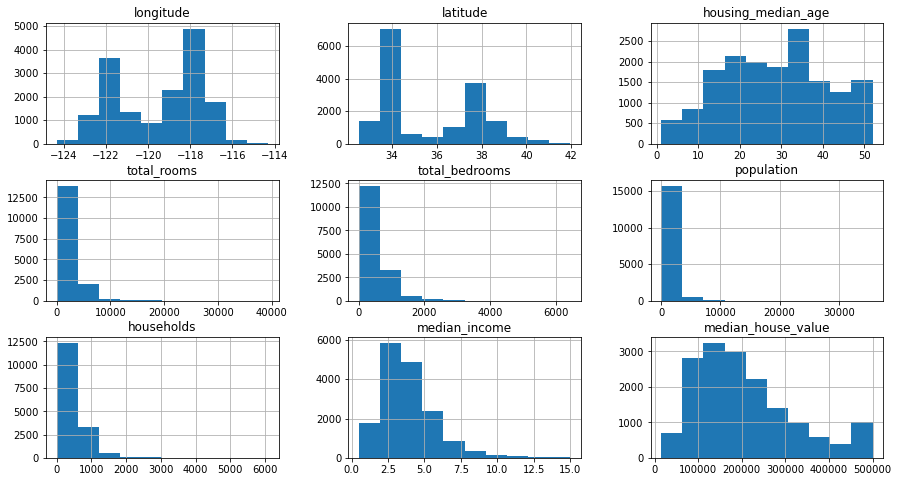

In [8]:
#histogram of training data to show distribution of features
train_data.hist(figsize = (15, 8))

<AxesSubplot:>

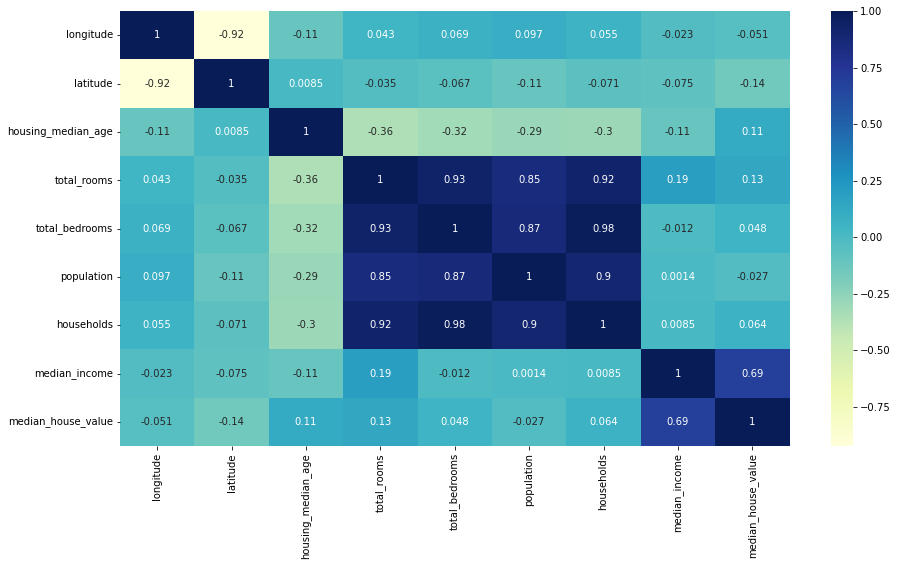

In [9]:
#correlation heatmap
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

### Data Preprocessing

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

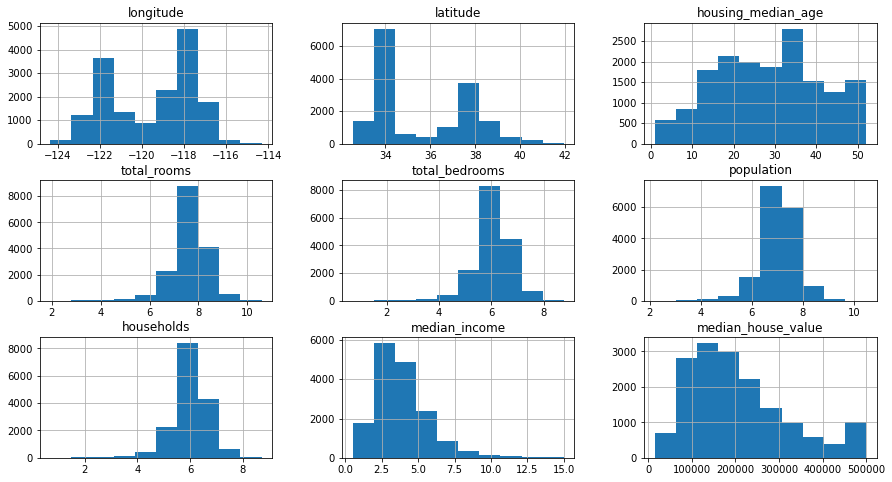

In [10]:
#noticed skewed data in histogram, so normalizing said data
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

train_data.hist(figsize = (15,8))

In [11]:
#ocean proximity is non-numeric data, so needs to be one hot encoded
#looking at value counts for the non-numeric data
train_data.ocean_proximity.value_counts()

<1H OCEAN     7184
INLAND        5216
NEAR OCEAN    2134
NEAR BAY      1809
ISLAND           3
Name: ocean_proximity, dtype: int64

In [12]:
#one hot encoding, joining new binary values to training data, and dropping ocean proximity
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<AxesSubplot:>

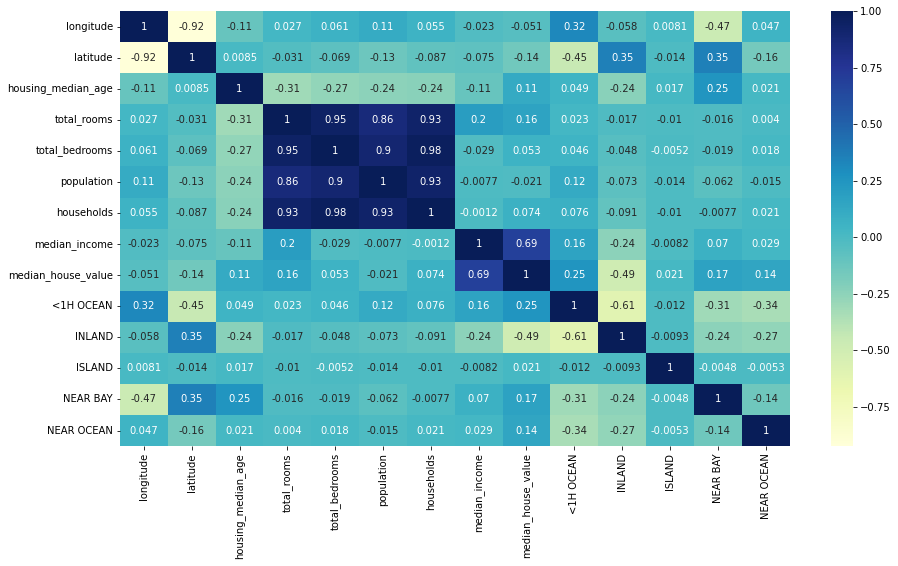

In [13]:
#looking at correlation now that we have ocean proximity values
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

#insight: inland is negatively correctlated with median house value (lower house values correlated with being inland)
#insight: 1H Ocean positively correlated with median house value (1H Oean correlated with higher house values)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

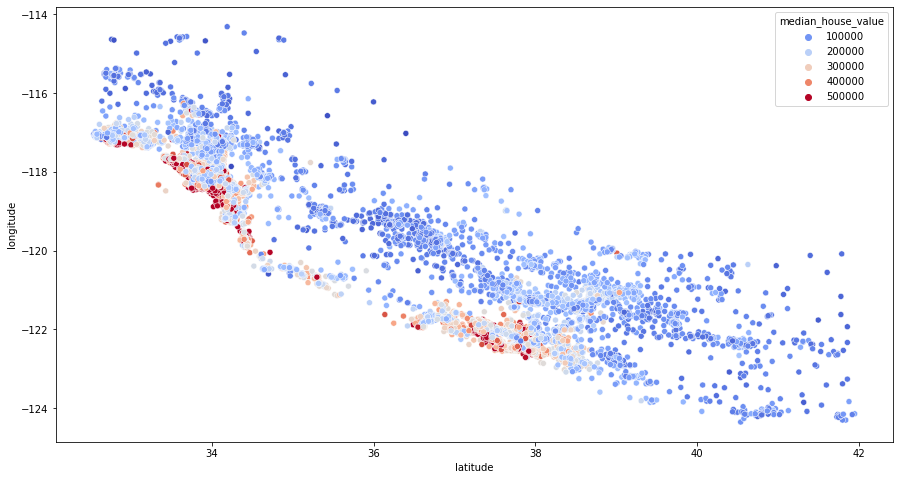

In [14]:
#visualizing coordinates
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data, hue = 'median_house_value', palette = 'coolwarm')

### Feature Engineering

In [15]:
#creating new features that could be insightful 
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<AxesSubplot:>

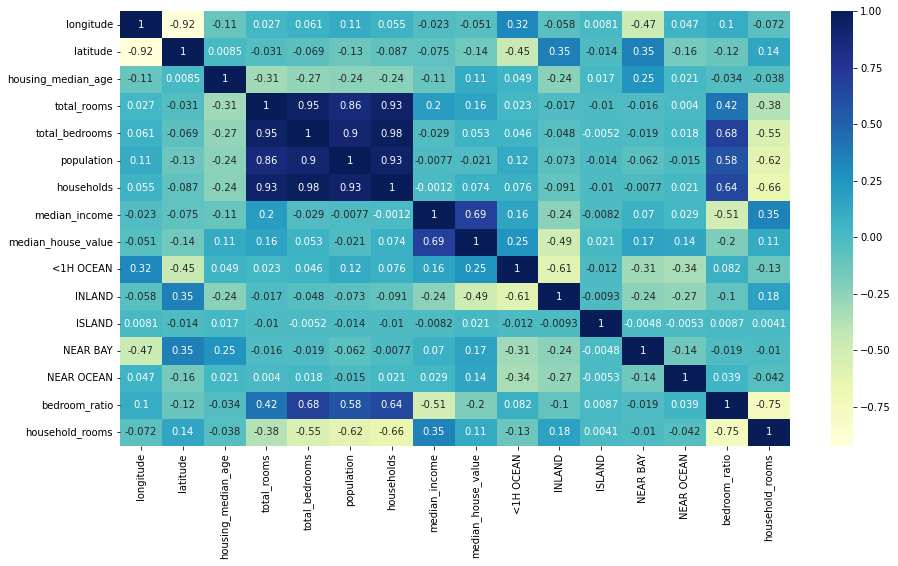

In [16]:
#correlation heatmap with new features
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

## Linear Regression Model

In [17]:
#splitting data again because we've added new features
X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [18]:
#testing the model

test_data = X_test.join(y_test)

#normalizing test data
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

#one hot encoding test data for ocean proximity
test_data = test_data .join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

#adding new features to test data
test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [19]:
#splitting test data

X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [20]:
reg.score(X_test, y_test)

0.6694105162773978

## Random Forest Regression

In [34]:
#fitting the model

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
#scoring the model
forest.score(X_test, y_test)

0.817167079780995

In [30]:
#Grid Search with Cross-validation/hyper parameter tuning

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [100,200,300],
    'min_samples_split':[2,4],
    'max_depth': [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
#determining best estimator 
best_forest = grid_search.best_estimator_

In [33]:
#scoring the model with best estimator
grid_search.best_estimator_.score(X_test, y_test)

0.8181736717213184